In [562]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [563]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [564]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


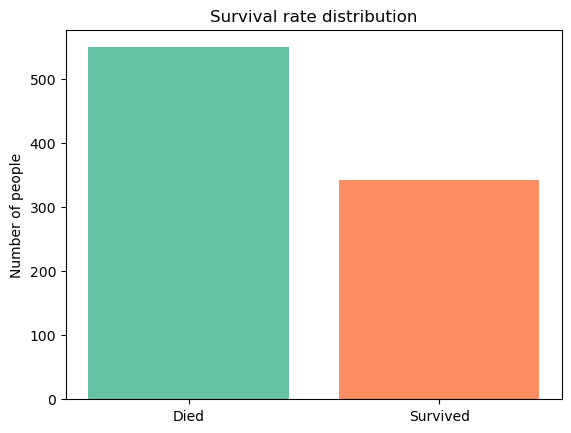

In [565]:
df2 = df['Survived'].value_counts()
fig, ax = plt.subplots()
x2 = ['Died', 'Survived']
ax.bar(x = x2,
       height = df2,
       color=sns.color_palette('Set2'))
ax.set_ylabel('Number of people')
plt.title('Survival rate distribution')
plt.show()

Классы немного несбалансированы, поскольку погибших людей в два раза больше выживших, поэтому логичнее будет исследовать такие метрики как f1-score, fbeta-score, roc-auc. Наилучшей в этом случае будет метрика F1-score, которая слабее всех чувствительная к дисбалансу классов. 

In [567]:
df = df[['Survived', 'Age', 'Sex', 'Pclass', 'Embarked' ]]
df = pd.get_dummies(df, columns=['Sex', 'Pclass', 'Embarked'])
df.dropna(inplace=True)
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,False,True,False,False,True,False,False,True
1,1,38.0,True,False,True,False,False,True,False,False
2,1,26.0,True,False,False,False,True,False,False,True
3,1,35.0,True,False,True,False,False,False,False,True
4,0,35.0,False,True,False,False,True,False,False,True


In [568]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [569]:
X = df.drop(columns = 'Survived')
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2025, test_size =0.5)

In [570]:
dummy_clf = DummyClassifier(strategy="most_frequent") #измерение качества константного предсказания
dummy_clf.fit(X_train, y_train);

In [571]:
y_pred_dc = dummy_clf.predict(X_test)
accuracy_score(y_test, y_pred_dc)

0.5882352941176471

In [572]:
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
print(f'Precision for DummyClassifier: {precision_score(y_test, y_pred_dc, zero_division=0)}')
print(f'Recall for DummyClassifier: {recall_score(y_test, y_pred_dc)}')

Precision for DummyClassifier: 0.0
Recall for DummyClassifier: 0.0


In [573]:

print(f'F1-score for DummyClassifier: {f1_score(y_test, y_pred_dc)}')
print(f'Fbeta-score for DummyClassifier (recall bias): {fbeta_score(y_test, y_pred_dc, beta=2)}')
print(f'Fbeta-score for DummyClassifier (precision bias): {fbeta_score(y_test, y_pred_dc, beta=0.5)}')

F1-score for DummyClassifier: 0.0
Fbeta-score for DummyClassifier (recall bias): 0.0
Fbeta-score for DummyClassifier (precision bias): 0.0


In [574]:
log_reg = LogisticRegression() # переходим к логистической регрессии
log_reg.fit(X_train, y_train);

In [575]:
y_pred = log_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.7983193277310925

In [576]:
from sklearn.model_selection import cross_val_score #кросс-валидация
cross_val_score(log_reg, X_train, y_train, cv=4)

array([0.81111111, 0.74157303, 0.75280899, 0.79775281])

In [577]:
print(f'Precision for Logistic regression: {precision_score(y_test, y_pred, zero_division=0)}')
print(f'Recall for Logistic regression: {recall_score(y_test, y_pred)}')

Precision for Logistic regression: 0.7697841726618705
Recall for Logistic regression: 0.7278911564625851


In [578]:
from sklearn.metrics import f1_score, fbeta_score
print(f'F1-score for Logistic regression: {f1_score(y_test, y_pred)}')
print(f'Fbeta-score for Logistic regression (recall bias): {fbeta_score(y_test, y_pred, beta=2)}')
print(f'Fbeta-score for Logistic regression (precision bias): {fbeta_score(y_test, y_pred, beta=0.5)}')

F1-score for Logistic regression: 0.7482517482517482
Fbeta-score for Logistic regression (recall bias): 0.7359009628610729
Fbeta-score for Logistic regression (precision bias): 0.7610241820768137


In [579]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       210
           1       0.77      0.73      0.75       147

    accuracy                           0.80       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.80      0.80      0.80       357



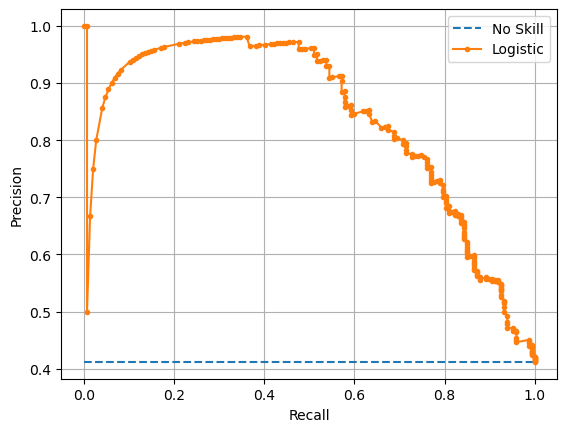

In [580]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np
y_pred = log_reg.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
no_skill = len(y_test[y_test == 1]) / len(y_test)
plt.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

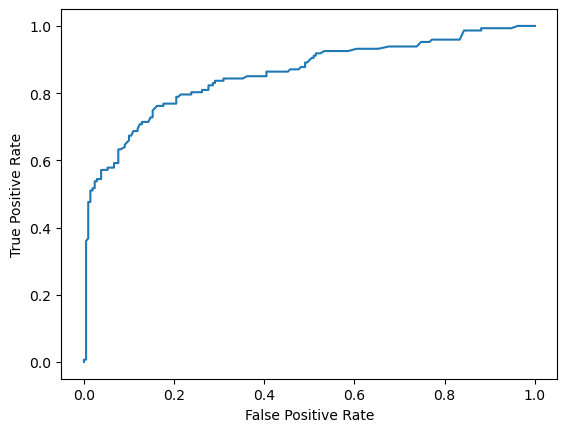

AUC: 0.857


In [581]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, _ = roc_curve(y_test,  y_pred)

# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = roc_auc_score(y_test, y_pred)
print("AUC: %.3f" % auc)

На основе обученной ML-модели мы получили достаточно высокое значение изученных метрик (F1-score - наиболее важна в данном случае), а также меры AUC и достаточно большую площадь под ROC-кривой, что говорит нам о том, что модель достаточно неплохо справляется со своей задачей классификации. Несмотря на то, что считается, что в условиях дисбаланса классов данная метрика несколько завышает качество модели, на мой взгляд в данном случае дисбаланс классов не сильно существенный.


Попытаемся предсказать выжила бы девушка 25 лет, котрая относилась к первому классу, у которой порт посадки был S = Southampton.

In [596]:
data = {
    'Age': [25],
    'Sex_female': [1],
    'Sex_male': [0],
    'Pclass_1': [1],
    'Pclass_2': [0],
    'Pclass_3': [0],
    'Embarked_C': [0],
    'Embarked_Q': [0],
    'Embarked_S': [1],
}

girl = pd.DataFrame(data)
log_reg.predict(girl)[0]
probability = log_reg.predict_proba(girl)[0][1]
print(f'Вероятность выживания: {probability:.1%}')



Вероятность выживания: 91.5%
